In [1]:
import numpy as np
import matplotlib.pyplot as plt

import ray
import time

from utils import *
from procedures import *
# https://albertcthomas.github.io/good-practices-random-number-generators/

# plt.rcParams["font.sans-serif"] = "Arial Unicode MS"
plt.rcParams["font.sans-serif"] = "DejaVu Sans"
# plt.rcParams["axes.unicode_minus"] = False
# mlib.rc('xtick', labelsize=15) 
# mlib.rc('ytick', labelsize=15) 
plt.rcParams["mathtext.default"]  = "it"
plt.rcParams["mathtext.fontset"]  = "dejavusans"

In [2]:
# Number of parallel threads to be used
# Shut down any existing Ray processes
# Initialize Ray with the specified number of parallel threads

num_cpus=96
ray.shutdown()
ray.init(num_cpus=num_cpus, ignore_reinit_error=True)

2022-12-24 22:42:02,510	INFO services.py:1274 -- View the Ray dashboard at http://127.0.0.1:8265


{'node_ip_address': '10.192.9.221',
 'raylet_ip_address': '10.192.9.221',
 'redis_address': '10.192.9.221:6379',
 'object_store_address': 'tcp://127.0.0.1:62331',
 'raylet_socket_name': 'tcp://127.0.0.1:61270',
 'webui_url': '127.0.0.1:8265',
 'session_dir': 'C:\\Users\\Admin\\AppData\\Local\\Temp\\ray\\session_2022-12-24_22-41-57_272818_29436',
 'metrics_export_port': 57544,
 'node_id': 'bf843089bcc67573e9dfadc5f041875d632ae04888a087512dbeb13a'}

In [3]:
seed = 20221224
np.random.seed(seed)
n_replications =1000

# problem size k=2**l. l = min_power,..., max_power
min_power = 13
max_power = 13
base = 2

# parameters of the problem configuration
gamma = 0.1
var = 1
lamda = -1.5
varlow = 1
varhigh = 2

rng = np.random.default_rng(seed)

In [6]:
power = 13
base = 2
ratios = [0.8]
ns = [100, 200, 300, 400, 500, 600, 700, 800]
n_replications = 1000

In [7]:
# EFG procedure: how the PCS grows as n (in N=n*k) increases
SCCV_results = []
EMCV_results = []
EMIV_results = []
EMDV_results = []

results_collection = [SCCV_results,EMCV_results, EMIV_results, EMDV_results]

# generate problem instance for k per each replication
SCCVgenerators =  [SCCVGenerator(base**power, gamma, var) for i in range(n_replications)]
EMCVgenerators =   [EMCVGenerator(base**power, gamma, lamda, var) for i in range(n_replications)]
EMIVgenerators =  [EMIVGenerator(base**power, gamma, lamda, varlow, varhigh) for i in range(n_replications)]
EMDVgenerators =  [EMDVGenerator(base**power, gamma, lamda, varlow, varhigh) for i in range(n_replications)]

generator_types = [SCCVgenerators, EMCVgenerators,  EMIVgenerators, EMDVgenerators]

for i, generators in enumerate(generator_types):
    print("----------------------------------Generator Type {}--------------------------------".format(i))
    for n in ns:
        print("----------------------------------n {}--------------------------------".format(n))
        for ratio in ratios:
            print("----------------------------------Exploration Ratio {}--------------------------------".format(ratio))
            n0 = np.int32(n * ratio)
            ng = n - n0
            PCS, PGS = parallel_experiments(rng, generators, policy=EFG, remote_policy=remote_EFG, args={"n0":n0, "ng":ng})
            results_collection[i].append(PCS)

----------------------------------Generator Type 0--------------------------------
----------------------------------n 100--------------------------------
----------------------------------Exploration Ratio 0.8--------------------------------
--------New experiments with  k=8192----------------------
Start to simulate... at Sat Dec 24 22:44:56 2022
PCS:0.166, PGS:0.166
Total time used: 59.396976709365845s, simulation ends at Sat Dec 24 22:45:54 2022
----------------------------------n 200--------------------------------
----------------------------------Exploration Ratio 0.8--------------------------------
--------New experiments with  k=8192----------------------
Start to simulate... at Sat Dec 24 22:45:56 2022
PCS:0.46, PGS:0.46
Total time used: 115.77904725074768s, simulation ends at Sat Dec 24 22:47:50 2022
----------------------------------n 300--------------------------------
----------------------------------Exploration Ratio 0.8--------------------------------
--------New exper

Start to simulate... at Sun Dec 25 00:10:35 2022
PCS:0.976, PGS:0.976
Total time used: 397.62364888191223s, simulation ends at Sun Dec 25 00:17:11 2022
----------------------------------n 700--------------------------------
----------------------------------Exploration Ratio 0.8--------------------------------
--------New experiments with  k=8192----------------------
Start to simulate... at Sun Dec 25 00:17:13 2022
PCS:0.985, PGS:0.985
Total time used: 455.1531047821045s, simulation ends at Sun Dec 25 00:24:46 2022
----------------------------------n 800--------------------------------
----------------------------------Exploration Ratio 0.8--------------------------------
--------New experiments with  k=8192----------------------
Start to simulate... at Sun Dec 25 00:24:48 2022
PCS:0.995, PGS:0.995
Total time used: 521.1251418590546s, simulation ends at Sun Dec 25 00:33:27 2022
----------------------------------Generator Type 3--------------------------------
-------------------------

In [8]:
# Greedy procedure: how the PCS grows as n (in N=n*k) increases

GSCCV_results = []
GEMCV_results = []
GEMIV_results = []
GEMDV_results = []

Gresults_collection = [GSCCV_results,GEMCV_results, GEMIV_results, GEMDV_results]

for i, generators in enumerate(generator_types):
    print("----------------------------------Generator Type: {}--------------------------------".format(i))
    for n in ns:
        print("----------------------------------n: {}--------------------------------".format(n))
        n0 = 1
        ng = n - n0
        PCS, PGS = parallel_experiments(rng, generators, policy=EFG, remote_policy=remote_EFG, args={"n0":n0, "ng":ng})
        Gresults_collection[i].append(PCS)

----------------------------------Generator Type: 0--------------------------------
----------------------------------n: 100--------------------------------
--------New experiments with  k=8192----------------------
Start to simulate... at Sun Dec 25 01:12:56 2022
PCS:0.121, PGS:0.121
Total time used: 320.7729961872101s, simulation ends at Sun Dec 25 01:18:15 2022
----------------------------------n: 200--------------------------------
--------New experiments with  k=8192----------------------
Start to simulate... at Sun Dec 25 01:18:17 2022
PCS:0.132, PGS:0.132
Total time used: 640.4464557170868s, simulation ends at Sun Dec 25 01:28:56 2022
----------------------------------n: 300--------------------------------
--------New experiments with  k=8192----------------------
Start to simulate... at Sun Dec 25 01:28:58 2022
PCS:0.128, PGS:0.128
Total time used: 960.6286451816559s, simulation ends at Sun Dec 25 01:44:57 2022
----------------------------------n: 400---------------------------

Start to simulate... at Sun Dec 25 11:58:56 2022
PCS:0.111, PGS:0.111
Total time used: 1657.785441160202s, simulation ends at Sun Dec 25 12:26:32 2022
----------------------------------n: 600--------------------------------
--------New experiments with  k=8192----------------------
Start to simulate... at Sun Dec 25 12:26:34 2022
PCS:0.117, PGS:0.117
Total time used: 1957.772013425827s, simulation ends at Sun Dec 25 12:59:10 2022
----------------------------------n: 700--------------------------------
--------New experiments with  k=8192----------------------
Start to simulate... at Sun Dec 25 12:59:12 2022
PCS:0.115, PGS:0.115
Total time used: 2290.6550743579865s, simulation ends at Sun Dec 25 13:37:21 2022
----------------------------------n: 800--------------------------------
--------New experiments with  k=8192----------------------
Start to simulate... at Sun Dec 25 13:37:22 2022
PCS:0.119, PGS:0.119
Total time used: 2597.1871078014374s, simulation ends at Sun Dec 25 14:20:38 202

In [9]:
results_collection

[[0.166, 0.46, 0.631, 0.768, 0.856, 0.885, 0.93, 0.935],
 [0.702, 0.838, 0.897, 0.939, 0.966, 0.977, 0.992, 0.989],
 [0.674, 0.83, 0.887, 0.945, 0.963, 0.976, 0.985, 0.995],
 [0.526, 0.712, 0.766, 0.821, 0.872, 0.898, 0.914, 0.922]]

In [10]:
Gresults_collection

[[0.121, 0.132, 0.128, 0.132, 0.121, 0.137, 0.13, 0.154],
 [0.151, 0.144, 0.129, 0.147, 0.141, 0.158, 0.149, 0.159],
 [0.136, 0.169, 0.137, 0.158, 0.158, 0.163, 0.154, 0.119],
 [0.1, 0.105, 0.099, 0.107, 0.111, 0.117, 0.115, 0.119]]

In [2]:
# ratios = [0.8]
# ns = [100, 200, 300, 400, 500, 600, 700, 800]
labels = [" EFG", " Greedy"]

# results drawn from the above experiments for producing the Figure 4 and EC1
# results_collection = np.array([[0.166, 0.46, 0.631, 0.768, 0.856, 0.885, 0.93, 0.935],
#  [0.702, 0.838, 0.897, 0.939, 0.966, 0.977, 0.992, 0.989],
#  [0.674, 0.83, 0.887, 0.945, 0.963, 0.976, 0.985, 0.995],
#  [0.526, 0.712, 0.766, 0.821, 0.872, 0.898, 0.914, 0.922]])

# Gresults_collection = np.array([[0.121, 0.132, 0.128, 0.132, 0.121, 0.137, 0.13, 0.154],
#  [0.151, 0.144, 0.129, 0.147, 0.141, 0.158, 0.149, 0.159],
#  [0.136, 0.169, 0.137, 0.158, 0.158, 0.163, 0.154, 0.119],
#  [0.1, 0.105, 0.099, 0.107, 0.111, 0.117, 0.115, 0.119]])

results_collection = np.concatenate([results_collection, Gresults_collection], axis=1)

results_collection = np.array([results.reshape(2, -1).T.reshape(-1) for results in results_collection])

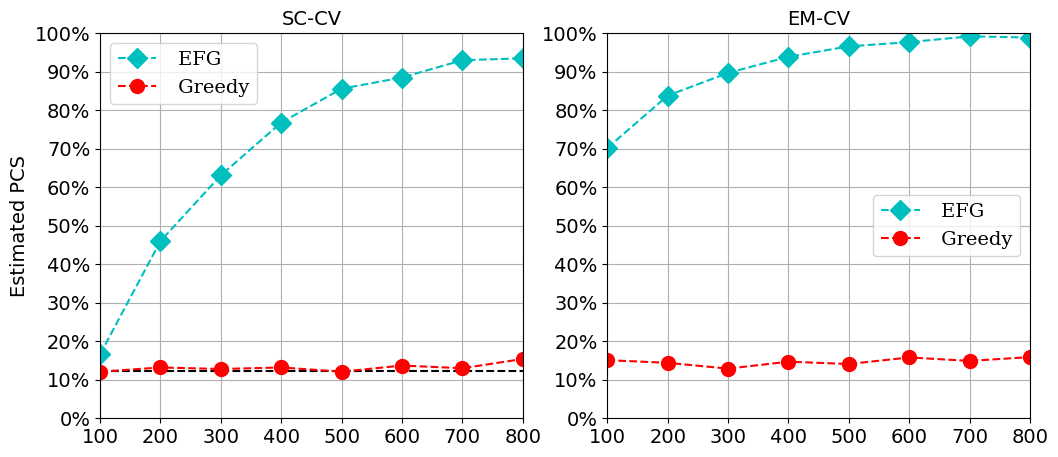

In [3]:
# powers = np.arange(min_power, max_power+1)
fontsize=14

colors = ["c", "r" , "b",  "m","c", "k"]
markers = ["D", "o", "d", "p", "D", "s"]
line_styles = ["--","--", "-.", ":","--", "-."]
fig = plt.figure(figsize=(12,5))

titles = ["SC-CV", "EM-CV", "EM-IV", "EM-DV"]

fig_plots = [(1,2,1), (1, 2, 2)]

for i, fig_plot in enumerate(fig_plots):
    
    ax = fig.add_subplot(*fig_plots[i])

    results = np.array(results_collection[i])
    results = results.reshape(len(ns), -1).T

    for j, result in enumerate(results):
        plt.plot(ns, result, line_styles[j], markersize=10, color=colors[j], marker=markers[j], label=labels[j])

    plt.xlim(ns[0], ns[-1])
    xticks = ns
    xticklabels = ns
    plt.xticks(xticks, xticklabels, fontsize=fontsize)
    
    if i == 0:
        pcs = 0.124
        ax.plot([ns[0], ns[-1]], [pcs, pcs], "--", color="k", zorder=0) # line_styles[i], color=colors[i], 

    
    plt.ylim(0.0, 1)
    yticks = np.arange(0.0, 1+0.1, 0.1)
    yticklabels = ["%.0f"%(tick*100)+"%" for tick in yticks]
    plt.yticks(yticks, yticklabels, fontsize=fontsize)

    ax.legend(fontsize=30, prop={'family': 'serif',"size":fontsize})
    if i == 2 or i == 3:
        ax.set_xlabel("$c$", size=fontsize)
    if i == 0 or i == 2:
        ax.set_ylabel("Estimated PCS", size=fontsize)
    plt.title(titles[i], fontsize=fontsize)
    plt.grid(0.2)

plt.show()

fig.savefig("Figure_4.pdf", bbox_inches='tight')

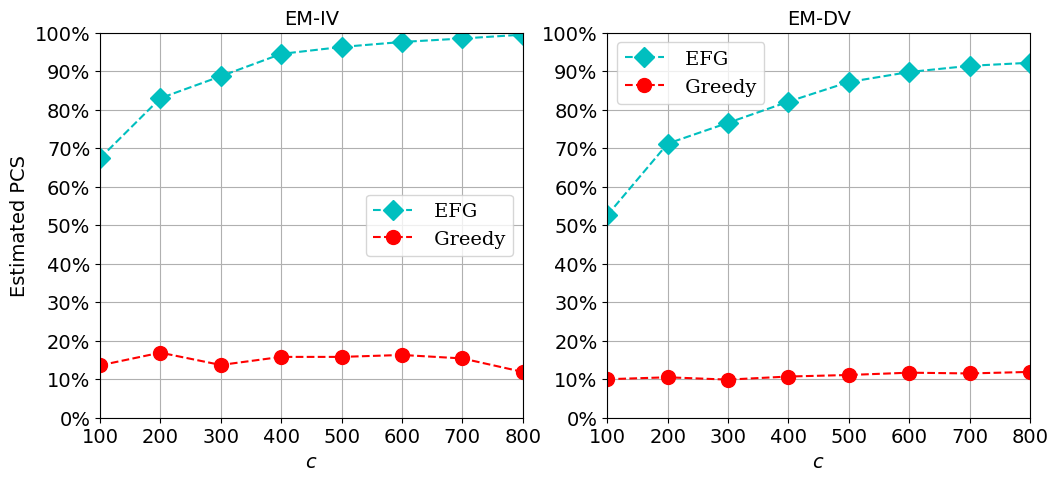

In [4]:
# powers = np.arange(min_power, max_power+1)
fontsize=14

colors = ["c", "r" , "b",  "m","c", "k"]
markers = ["D", "o", "d", "p", "D", "s"]
line_styles = ["--","--", "-.", ":","--", "-."]
fig = plt.figure(figsize=(12,5))

titles = ["SC-CV", "EM-CV", "EM-IV", "EM-DV"]

fig_plots = [(1,2,1), (1, 2, 2)]

for _i, fig_plot in enumerate(fig_plots):
    
    ax = fig.add_subplot(*fig_plots[_i])
    i = _i + 2

    results = np.array(results_collection[i])
    results = results.reshape(len(ns), -1).T

    for j, result in enumerate(results):
        plt.plot(ns, result, line_styles[j], markersize=10, color=colors[j], marker=markers[j], label=labels[j])

    plt.xlim(ns[0], ns[-1])
    xticks = ns
    xticklabels = ns
    plt.xticks(xticks, xticklabels, fontsize=fontsize)
    
    if i == 0:
        pcs = 0.124
        ax.plot([ns[0], ns[-1]], [pcs, pcs], "--", color="k", zorder=0) # line_styles[i], color=colors[i], 

    
    plt.ylim(0.0, 1)
    yticks = np.arange(0.0, 1+0.1, 0.1)
    yticklabels = ["%.0f"%(tick*100)+"%" for tick in yticks]
    plt.yticks(yticks, yticklabels, fontsize=fontsize)

    ax.legend(fontsize=30, prop={'family': 'serif',"size":fontsize})
    if i == 2 or i == 3:
        ax.set_xlabel("$c$", size=fontsize)
    if i == 0 or i == 2:
        ax.set_ylabel("Estimated PCS", size=fontsize)
    plt.title(titles[i], fontsize=fontsize)
    plt.grid(0.2)

plt.show()

fig.savefig("Figure_EC1.pdf", bbox_inches='tight')